# 1- Problem statement

In this project we are trying to predict the home prices based on multiple parameters:
Independent variables:
1.	Area
2.	Bedrooms-Num
3.	Age

Dependant variable(feature)

 1.home_price


In [2]:
# firstly will call the basic libraries to load and discover the data set
#Import all important libraries 
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

__author__ = "Ahmad Shhadeh"
__email__ = "ashhadeh@yahoo.com"
__Date__ = "2019-06-29"

# 2 - Load & descover the dataSet


In [4]:
#read the test data using panda's function 
df=pd.read_csv("homeprices.csv")
df



,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


# 3 - Data reprocessing and cleaning

#chcking the duplicate data, invalid data, nulls  or corrupt data ...etc 

In [5]:
df


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:

# From the above data, we noticed that there 3rd rows has "NaN" on bedroom column 
# for that we have to take action before we proceed as all ML linear models work only with numbers

#There are different ways to handle the empty/Null record, and all depend on our understanding of the data and the requirement 
#For example below some of actions can take:
#1- Drop the complete row
#2- Replaced with 0
#3- Replaced with mean/median or mood
#4- ...etc 
 
#In our case to make it simple we are going to calculate the median use instead of NULL


In [6]:
# to find the median for bedrooms
import math
median_bedrooms=df.bedrooms.median()

#to replace teh new value with NULL will use fillna function 
df.bedrooms=df.bedrooms.fillna(median_bedrooms)
median_bedrooms



4.0

In [7]:
# the data set after reprocessing
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


#Checking the correlation between the variables



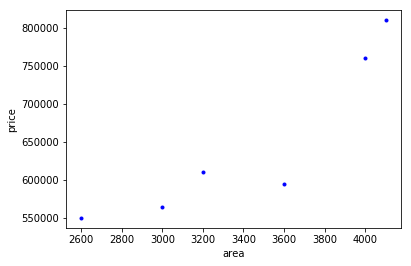

In [8]:
#Area vs Price 
# plotting the data in the chart to explore the data distribution and choose the best model

%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='Blue',marker='.')




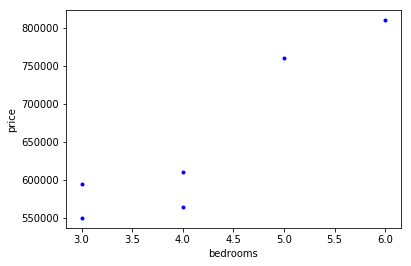

In [9]:
#bedrooms vs Price 
# plotting the data in the chart to explore the data distribution and choose the best model

%matplotlib inline
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.scatter(df.bedrooms,df.price,color='Blue',marker='.')

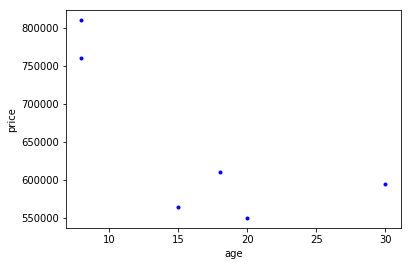

In [10]:
#Home Age vs Price 
# plotting the data in the chart to explore the data distribution and choose the best model

%matplotlib inline
plt.xlabel('age')
plt.ylabel('price')
plt.scatter(df.age,df.price,color='Blue',marker='.')

In [28]:
#will devide the dat set to train set and test set 
# preparing X&y
X=df.drop('price',axis='columns')
y=df.price
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)
# X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)
# to get same result for each run we can sue eandom_state parameter

In [29]:
# 80% for training 
len(X_train)

4

In [30]:
len(y_train)

4

In [33]:
X_train

,area,bedrooms,age
0,2600,3.0,20
3,3600,3.0,30
4,4000,5.0,8
1,3000,4.0,15


In [34]:
X_test

,area,bedrooms,age
2,3200,4.0,18
5,4100,6.0,8


In [35]:
y_train

0    550000
3    595000
4    760000
1    565000
Name: price, dtype: int64

In [36]:
y_test

2    610000
5    810000
Name: price, dtype: int64

# 4- Model Creation 


In [37]:
# looking for the relation between the independent variable and dependant it seems simple and linear
# we are going to choose linear regression model

#Create linear regression object
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# extar checking for the result 
# it is a linear regression relation and the standard equation for that is
# Y = m * X + b (m is coefficient and b is intercept)


In [38]:
reg.coef_

array([    236.25, -175125.  ,  -19125.  ])

In [39]:
reg.intercept_


843624.9999999991

In [42]:
# runing the model
reg.predict (X_test)


array([554875., 608500.])

In [43]:
y_test

2    610000
5    810000
Name: price, dtype: int64

In [44]:
# to check the model accuracy
# will compre between above results 
#y_test vs y_predicted
#y_predicted: 608500, 319000
#y_test:   810000  ,760000


reg.score(X_test,y_test)

-1.1820507812500058